<a href="https://colab.research.google.com/github/Shuregg/dsp-labs/blob/lab1-noise-like-signals/Lab1_noise_like_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# @title Noise-like signals
# The initial data for the formation M-sequences
# Variant   phase (A)     characteristic polynomial С1            С2
# 12        1000001100                          10110001111    10110010111

import matplotlib.pyplot as plt
import numpy
from scipy.signal import max_len_seq
import random
def inverse_list_bits(bin_list):
  for i in range(len(bin_list)):
    if(bin_list[i] == 0):
      bin_list[i] = 1
    elif(bin_list[i] == 1):
      bin_list[i] = 0

def inverse_sign(list_):
  inverted = []
  for i in range(len(list_)):
    inverted.append(-list_[i])
  return inverted

def indexes_of_specific_value(list_, value_to_check):
  list_of_indexes = []
  for i in range(len(list_)):
    if(list_[i] == value_to_check):
      list_of_indexes.append(i+1)
  return list_of_indexes

def bin_to_neg_lvl(bin_list):
  new_list = []
  for i in range (len(bin_list)):
    if(bin_list[i] == 0):
      new_list.append(1)
    elif(bin_list[i] == 1):
      new_list.append(-1)
  return new_list

def print_n_plot_signal(list_, name):
  print("\n")
  print(name, "length:", len(list_))
  print(name, "values:", list_)
  fig = plt.figure(figsize=(16, 4))
  plt.plot(list_)
  plt.title(name)
  plt.show()
# =============== The initial data for the formation M-sequences ================
A = [1, 0, 0, 0, 0, 0, 1, 1, 0, 0]            # Phase
C1 = [0, 1, 1, 0, 0, 0, 1, 1, 1]              # Characteristic polynomial C1
C2 = [0, 1, 1, 0, 0, 1, 0, 1, 1]              # Characteristic polynomial C2
N = 10                                        # Number of registers in Linear-feedback shift register
variant = 12

# ==================
# KR1 selftest
# N = 3
# A = [1, 0, 0]
# variant = -9.9
# ==================

print("Phase: ", A)
print("C1: ", C1)
print("C2: ", C2, )
print("C1 indexes: ", indexes_of_specific_value(C1, 1))
print("C2 indexes: ", indexes_of_specific_value(C2, 1))
shift = (100+variant*10)

Phase:  [1, 0, 0, 0, 0, 0, 1, 1, 0, 0]
C1:  [0, 1, 1, 0, 0, 0, 1, 1, 1]
C2:  [0, 1, 1, 0, 0, 1, 0, 1, 1]
C1 indexes:  [2, 3, 7, 8, 9]
C2 indexes:  [2, 3, 6, 8, 9]




M1 length: 1023
M1 values: [-1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1,

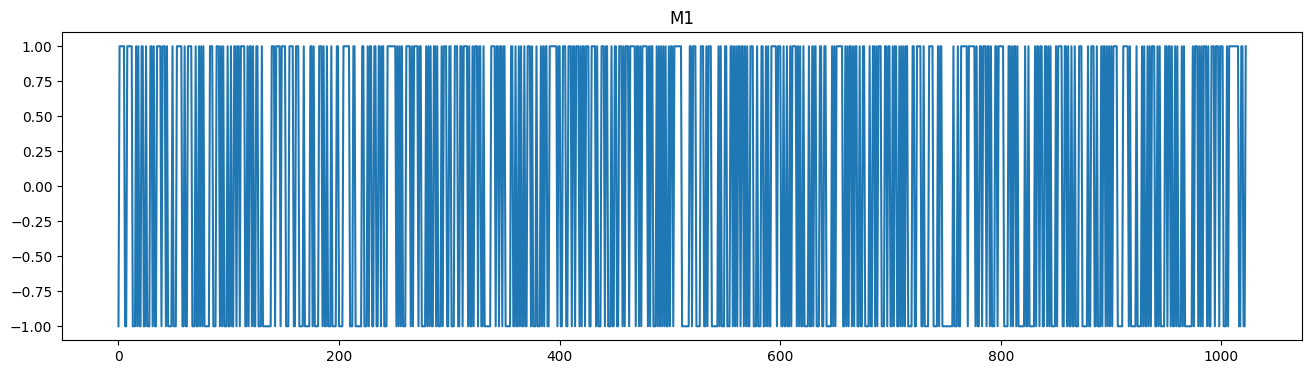



M2 length: 1023
M2 values: [-1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, -1,

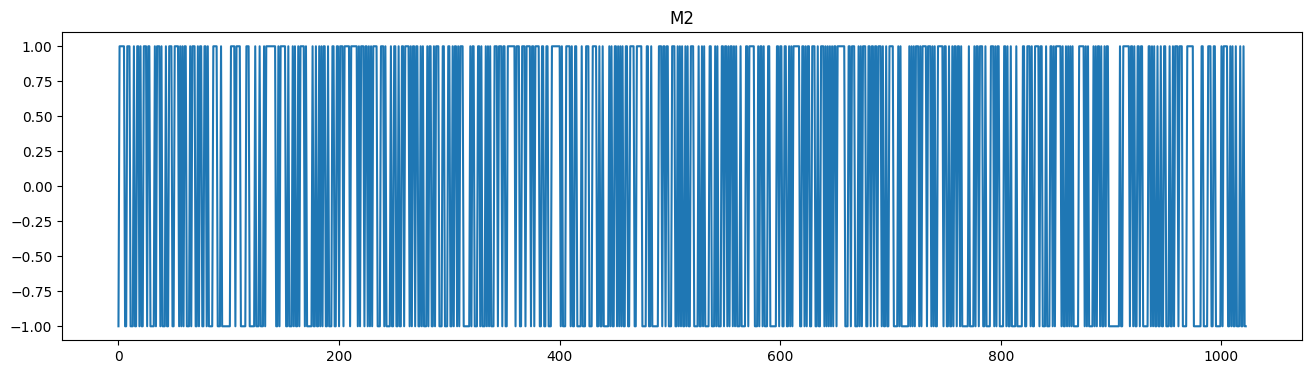

In [89]:
# @title 1.1. Формирование двух М-последовательностей M1, M2 на основе начальных данных
M1 = max_len_seq(nbits=N, state=A, taps=indexes_of_specific_value(C1, 1))
M2 = max_len_seq(nbits=N, state=A, taps=indexes_of_specific_value(C2, 1))

M1_n = bin_to_neg_lvl(M1[0])
M2_n = bin_to_neg_lvl(M2[0])

# ==================
# KR1 selftest
# M1_n = [1, 1, -1, -1, -1, 1, -1]
# M2_n = [-1, 1, 1, -1, 1, -1, -1]
# ==================

print_n_plot_signal(M1_n, "M1")
print_n_plot_signal(M2_n, "M2")



M_sum length: 1243
M_sum values: [-1  1  1 ... -1  1  1]


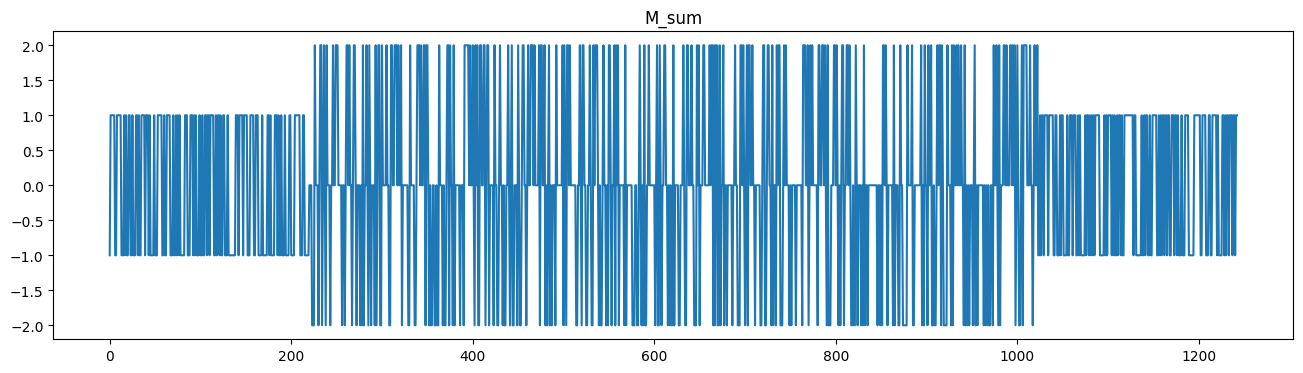

In [90]:
# @title 1.2. Формирование суммы M-последовательностей Msum = M1 + ~M2_shifted
M1_sh = M1_n + (shift)*[0]
M2_sh = (shift)*[0] + M2_n

# ==================
# KR1 selftest
# M1_sh = M1_n + [0]
# M2_sh = [0] + M2_n
# ==================

M2_sh_inv = inverse_sign(M2_sh)
M_sum = numpy.add(M1_sh, M2_sh_inv)
print_n_plot_signal(M_sum, "M_sum")



АКФ M1 length: 2045
АКФ M1 values: [-1  2  1 ...  1  2 -1]


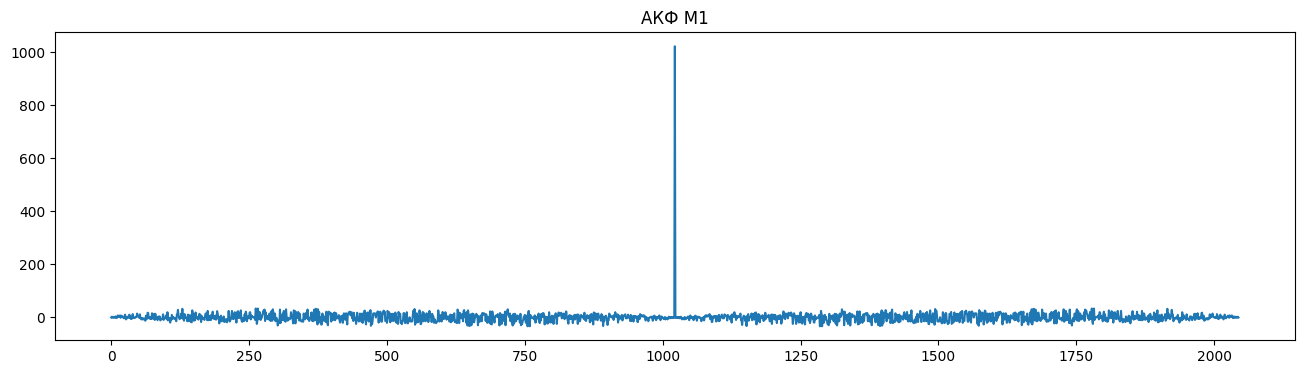

In [91]:
# @title 1.3. Построение авто-коррелляционной функции (АКФ) для M1
ACF = numpy.correlate(M1_n, M1_n, "full") # АКФ
print_n_plot_signal(ACF, "АКФ M1")



ВКФ M1, ~M2>> length: 2045
ВКФ M1, ~M2>> values: [ 1  0 -3 ...  1  2 -1]


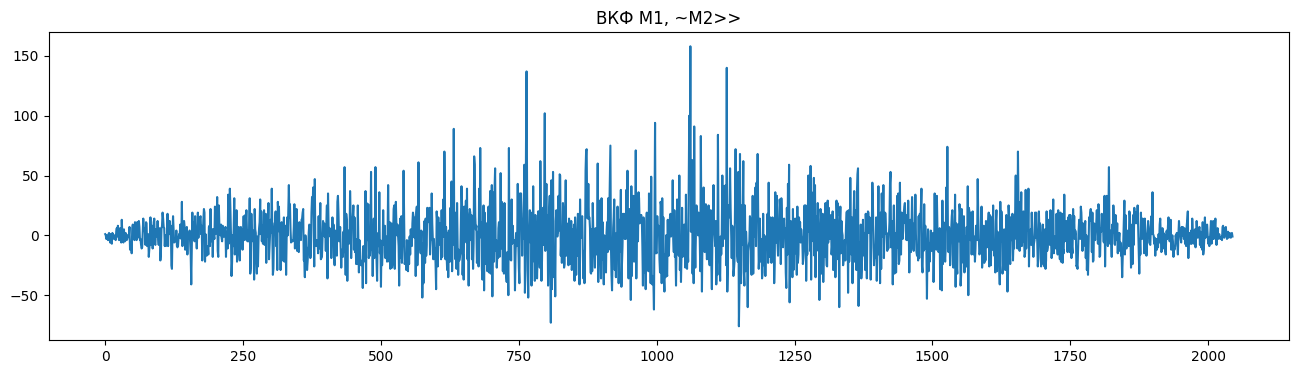

In [92]:
# @title 1.4. Построение взаимно-коррелляционной функции (ВКФ) для M1, ~M2>>
CCF = numpy.correlate(M1_n, M2_n, "full") # ВКФ
print_n_plot_signal(CCF, "ВКФ M1, ~M2>>")



filtering M1 from M_sum length: 2485
filtering M1 from M_sum values: [ 0  0  0 ...  3  0 -1]


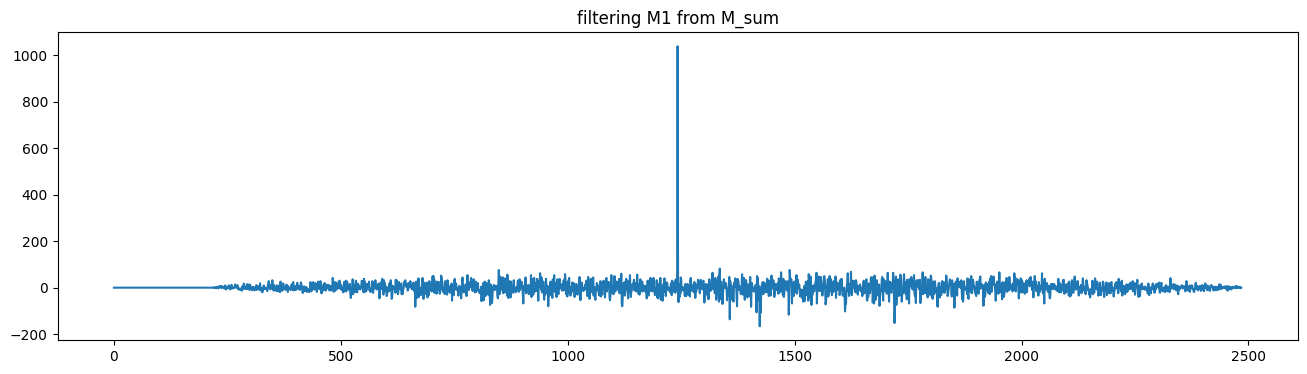

In [93]:
# @title 1.5. Фильтрация сигнала M1 из суммы сигналов M_sum
# numpy.correlate(<signal>, <ref func>)
M1_filtered = numpy.correlate(M_sum, M1_sh, "full")
print_n_plot_signal(M1_filtered, "filtering M1 from M_sum")



filtering M2 from M_sum length: 2485
filtering M2 from M_sum values: [ 1  0 -3 ...  0  0  0]


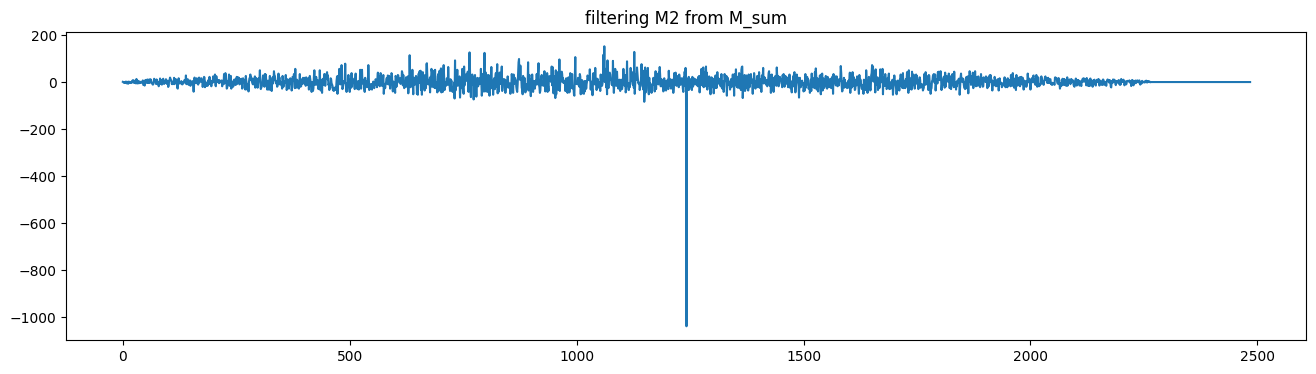

In [94]:
# @title 1.6. Фильтрация сигнала M2 из суммы сигналов M_sum
M2_filtered = numpy.correlate(M_sum, M2_sh, "full")
print_n_plot_signal(M2_filtered, "filtering M2 from M_sum")



M3=M1+noise length: 1023
M3=M1+noise values: [-0.13601938  2.09905176  2.15658078 ...  0.71213984 -1.83448509
  0.42424436]


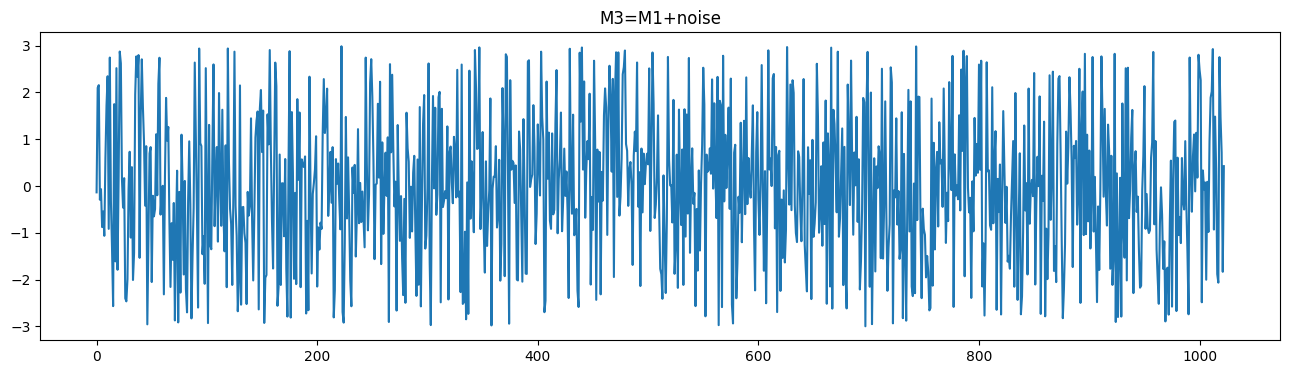

In [95]:
# @title 1.7 Формирование M3 путем зашумления M1
A_noise = 2
# rng = numpy.random.default_rng(12345)
# noise = rng.random((1, 100))
noise = []
for i in range (len(M1_n)):
  noise.append(random.uniform(-A_noise, A_noise))

# noise_text = ("noise with amplitude = "+str(A_noise))
# print_n_plot_signal(noise, noise_text)
# print_n_plot_signal(M1_n, "M1")

M3 = numpy.add(M1_n, noise)
print_n_plot_signal(M3, "M3=M1+noise")



filtering M1 from M3 length: 2045
filtering M1 from M3 values: [-0.13601938  2.23507114  0.19354841 ... -2.12238058  2.25872945
 -0.42424436]


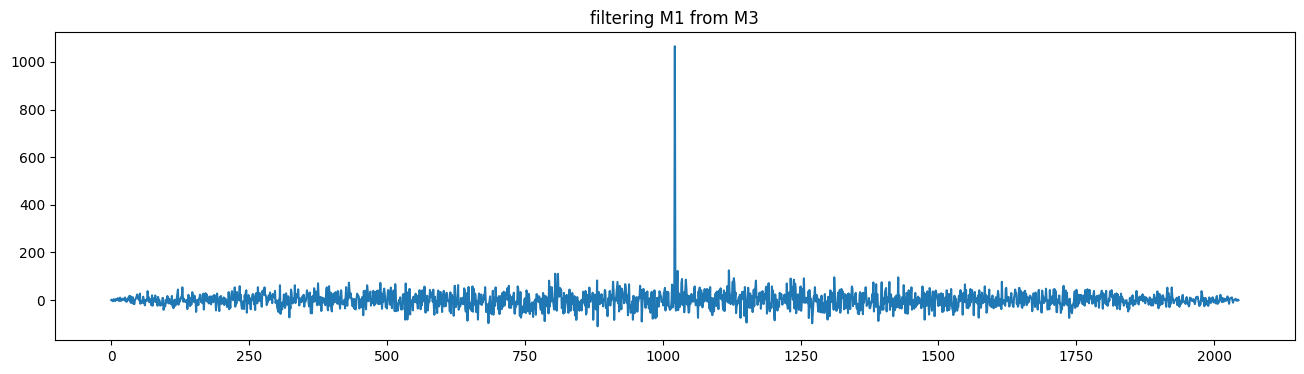

In [96]:
# @title 1.8. Из M3 отфильтровать M1 (M3 - сигнал,M1 - опорная функция), изобразить полученный результат на графике.
M1_filtered_from_M3 = numpy.correlate(M3, M1_n, 'full')
print_n_plot_signal(M1_filtered_from_M3, "filtering M1 from M3")



A [dB] = log10( |A / A_max| ) length: 1023
A [dB] = log10( |A / A_max| ) values: [-77.87797851587084, -54.10953161389286, -53.87467993350627, -71.22010205233971, -83.96983611517554, -61.67975668742331, -65.81955797264368, -60.00184933834654, -65.16742061200429, -55.85401006812064, -53.14175982674156, -61.30989739983732, -51.77541020235257, -70.05248209242009, -58.00851154444433, -52.357274155283655, -55.68923994578401, -56.40531728516892, -52.525116746047516, -55.48753991895584, -73.55870680587886, -51.378501606602036, -52.17116528065965, -77.36570827117225, -67.26556813920182, -76.07395503518718, -52.9442038753122, -52.70758986924868, -54.57108271798252, -83.72487815255181, -63.26266459713756, -59.693995482221, -68.44102088720169, -54.48841020631456, -57.45131650803376, -54.72855019272917, -51.6996186181329, -53.17240997895653, -51.61124494968639, -56.821597287082625, -57.196968526183376, -51.89601586017369, -55.99231997957753, -61.04415100388686, -68.09818118040893, -61.94896109120

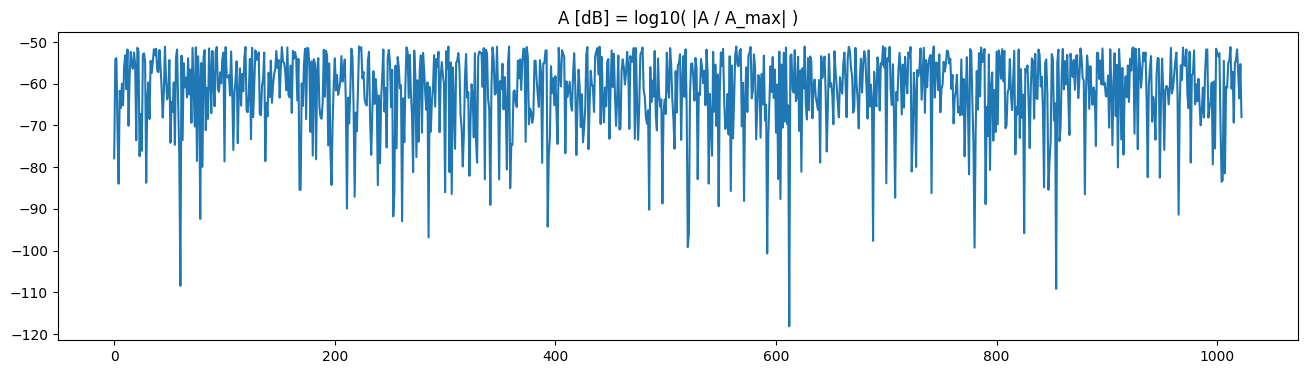

In [97]:
# @title 1.9. Изображение зависимости, полученную в п. 1.8, в логарифмических единицах (dB) и анализ полученных результатов.
A_max = max(M1_filtered_from_M3)
A_dB = []
for i in range (len(M3)):
  A_dB.append(20 * numpy.log10(abs(M3[i] / A_max)))
print_n_plot_signal(A_dB, "A [dB] = log10( |A / A_max| )")

In [98]:
# @title 2. Синтез и фильтрация кодов Уолша-Адамара.
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import hadamard
from sympy import fwht, ifwht

data1 = 12    # кодируемые данные
data2 = 239
r = 10        # разрядность

Hadamard marix
 [[ 1  1  1 ...  1  1  1]
 [ 1 -1  1 ... -1  1 -1]
 [ 1  1 -1 ...  1 -1 -1]
 ...
 [ 1 -1  1 ... -1  1 -1]
 [ 1  1 -1 ...  1 -1 -1]
 [ 1 -1 -1 ... -1 -1  1]]

W1 = [1 1 1 ... 1 1 1]
W2 = [ 1 -1 -1 ...  1  1 -1]


W1 length: 1024
W1 values: [1 1 1 ... 1 1 1]


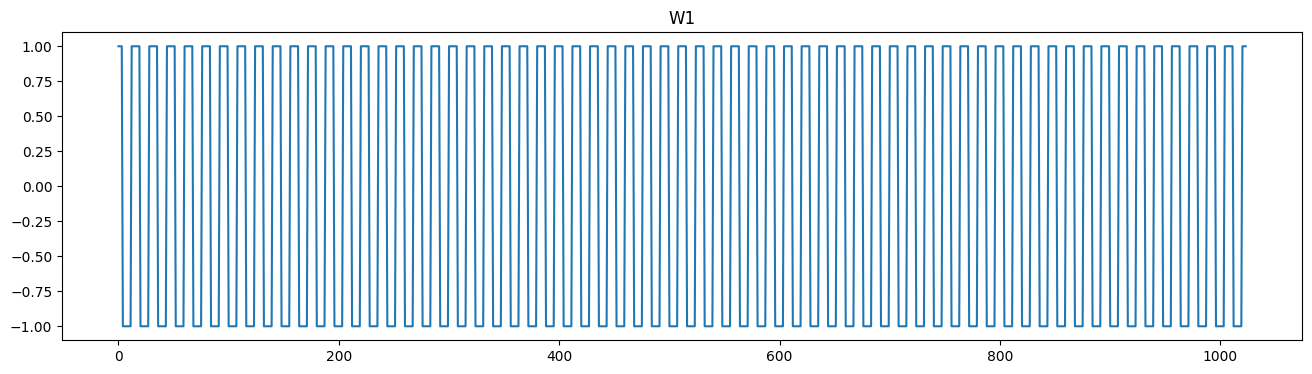



W2 length: 1024
W2 values: [ 1 -1 -1 ...  1  1 -1]


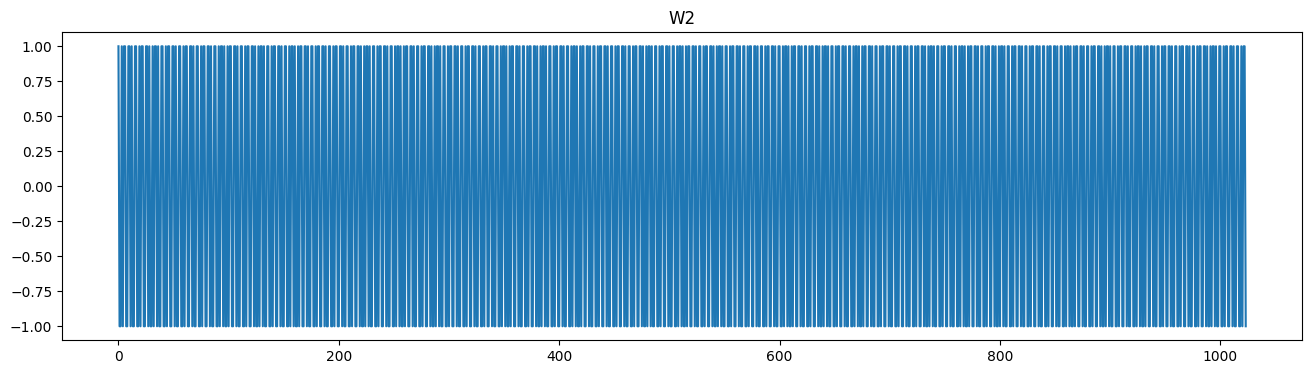

In [99]:
# @title 2.1 Формирование двух кодов W1 и W2 при помощи матрицы Адамара.

hadamard_matrix = hadamard(2**r)
print("Hadamard marix\n", hadamard_matrix)
W1 = hadamard_matrix[data1]
W2 = hadamard_matrix[data2]
print("\nW1 =", W1)
print("W2 =", W2)
print_n_plot_signal(W1, "W1")
print_n_plot_signal(W2, "W2")



W_sum = W1 + W2 length: 1024
W_sum = W1 + W2 values: [2 0 0 ... 2 2 0]


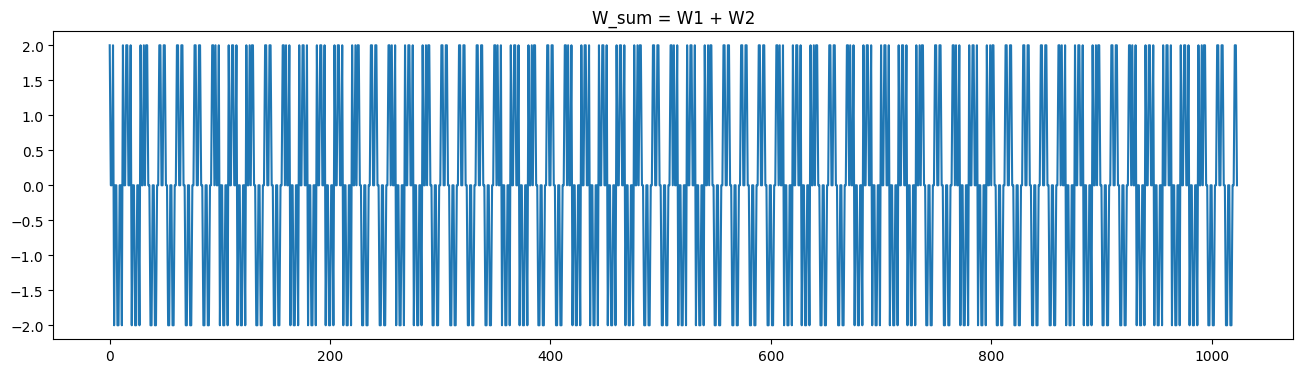

In [100]:
# @title 2.2 Формирование суммы кодов W_sum = W1 + W2

W_sum = W1 + W2
print_n_plot_signal(W_sum, "W_sum = W1 + W2")



fWHt for W_sum (БПУА для W_sum) length: 1024
fWHt for W_sum (БПУА для W_sum) values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

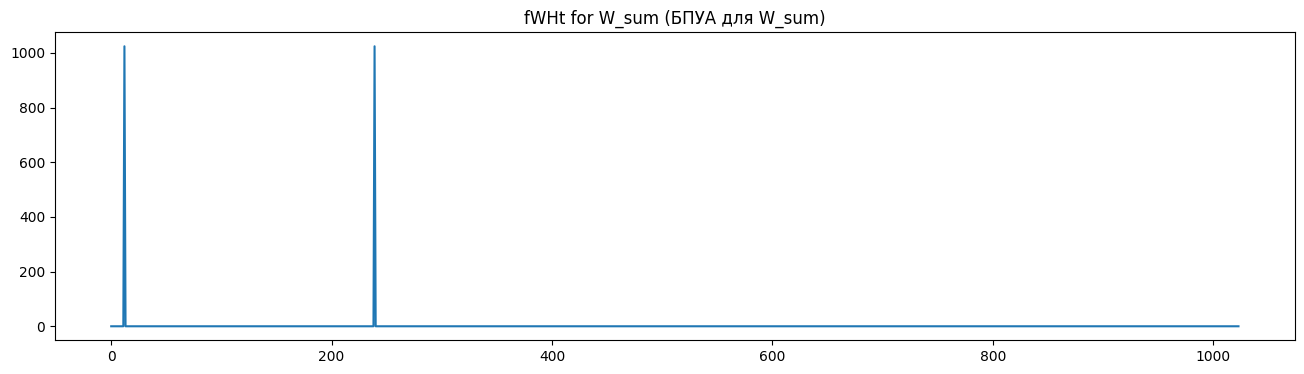

In [101]:
# @title 2.3 Вычисление БПУА для суммы кодов W_sum при помощи функции sympy.discrete.transforms.fwht

# fast Walsh-Hadamard transformation
W_sum_fwht = fwht(W_sum)
print_n_plot_signal(W_sum_fwht, "fWHt for W_sum (БПУА для W_sum)")



W3 = W_sum + noise (noise amp = 10) length: 1024
W3 = W_sum + noise (noise amp = 10) values: [-6.383347   -5.410799   -6.16648816 ... -3.38291881  4.27855666
 -2.56095243]


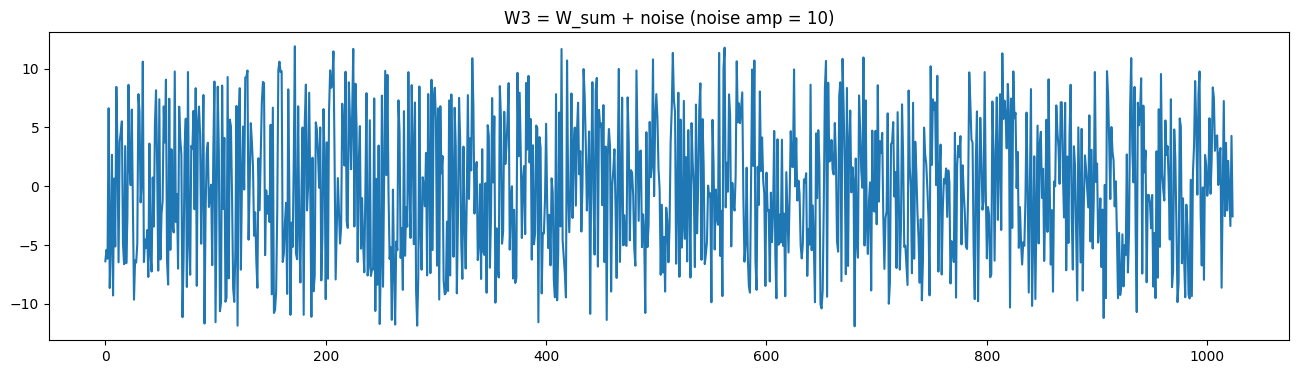

In [102]:
# @title 2.4 Исследование кодов Уолша-Адамара на шумоподавление (аналогично этапам 2.7 - 2.9). Формирование W3 = W_sum + noise
A_noise_W = 10 #noise_W Amplitude
# rng = numpy.random.default_rng(12345)
# noise = rng.random((1, 100))
noise_W = []
for i in range (len(W_sum)):
  noise_W.append(random.uniform(-A_noise_W, A_noise_W))
W3 = W_sum + noise_W
print_n_plot_signal(W3, "W3 = W_sum + noise (noise amp = 10)")



W3_fwht length: 1024
W3_fwht values: [-219.209991251799, 31.8501075317771, -417.310617778092, -272.014622795468, -102.078067910911, -120.206616972461, 176.973563059501, 408.953927500156, -97.2066959229846, 380.970054796847, 212.398148898178, 41.7710306824500, 862.371146302404, -245.313451043371, 170.858913893315, 14.7280794422648, 10.5921501497590, -215.403762921517, -111.508843936054, 247.466444299592, -72.5377186086016, 30.9464470964457, -284.395821273606, -6.54182588109707, -150.671549399363, -150.744450151626, 79.7872051373625, -84.1209295656837, -36.6610969575644, 49.9131116121765, 218.427221903288, -78.7953804424505, -145.523448640955, -129.149721248643, 252.976126166263, -13.7480593172095, 76.9949754203009, 305.898539708437, -0.872857744042633, 313.303580424540, 10.4021311379909, 302.005619420103, 329.110476731623, -140.077915318479, 120.561256861697, 76.5955998695136, -360.218336673025, -207.432341330104, 23.8682356843354, -11.8469353731288, -19.3194669405080, -35.87700190072

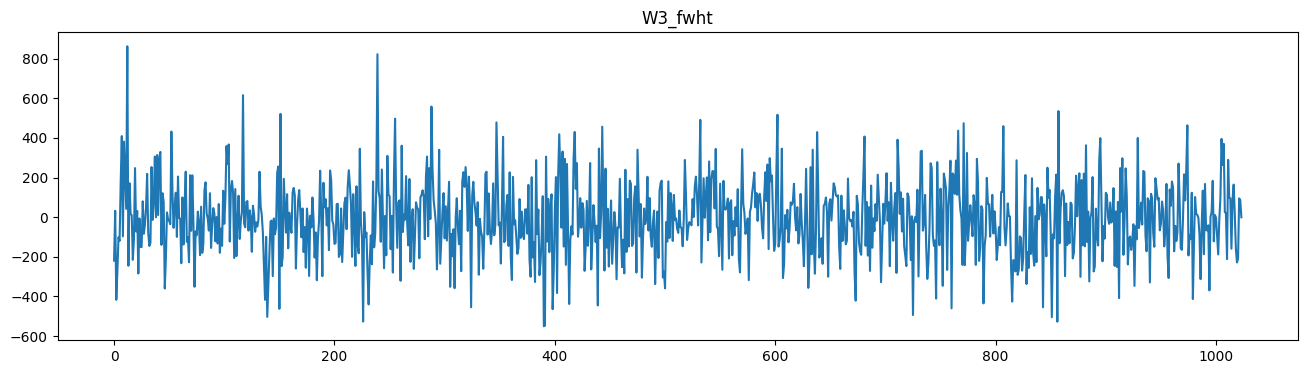

In [104]:
# @title 2.5 Вычисление БПУА для W3.
W3_fwht = fwht(W3)
print_n_plot_signal(W3_fwht, "W3_fwht")